In [1]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import sklearn.metrics as metrics
import warnings

In [2]:
adnimerge = pd.read_csv('data-test(CNvsMCI文章数据).csv') # 读取全部数据
adnimerge.head()

,RID,Label,Visit_Code,RBM Sample ID,Sample_Received_Date,Alpha-1-Microglobulin (A1Micro) (ug/ml),Alpha-2-Macroglobulin (A2Macro) (mg/mL),Alpha-1-Antichymotrypsin (AACT) (ug/ml),Alpha-1-Antitrypsin (AAT) (mg/mL),Angiotensin-Converting Enzyme (ACE) (ng/ml),...,Thrombopoietin (ng/mL),TNF-Related Apoptosis-Inducing Ligand Re (ng/mL),Serotransferrin (Transferrin) (mg/dl),Thyroid-Stimulating Hormone (TSH) (uIU/mL),Transthyretin (TTR) (mg/dl),Vascular Cell Adhesion Molecule-1 (VCAM- (ng/mL),Vascular Endothelial Growth Factor (VEGF (pg/mL),Vitronectin (ug/ml),Vitamin K-Dependent Protein S (VKDPS) (ug/ml),von Willebrand Factor (vWF) (ug/mL)
0,8,CN,bl,GA8000D4-02,20-Sep-05,0.97313,0.27875,3.12710,0.50515,1.97772,...,2.1,0.75587,3.46982,0.32222,2.67943,2.86153,2.81954,2.88986,1.41497,1.89763
1,8,CN,m12,HA803FG6-02,21-Sep-06,0.94448,0.07918,3.16137,0.49136,1.96848,...,3.4,0.69897,3.37475,0.44716,2.50651,2.88423,2.87099,2.97081,1.41497,1.83251
2,14,CN,bl,BA802V7G-02,7-Nov-05,1.00000,0.07918,2.52244,0.47712,1.93952,...,1.0,1.14613,3.41830,0.07918,2.68124,2.68124,2.73400,2.90526,1.30103,1.77815
3,14,CN,m12,CA8038SK-02,28-Nov-06,1.04139,-0.04096,2.50786,0.43136,1.79934,...,2.5,1.00000,3.36736,0.04139,2.45332,2.70070,2.65801,2.90417,1.25527,1.63347
4,19,CN,bl,DA800199-03,30-Nov-05,0.96379,0.20412,2.28556,0.51851,1.90309,...,2.5,1.20412,3.66464,0.07918,2.58320,3.14613,2.71684,2.92012,1.34242,1.41497


In [3]:
adnimerge['Label'].value_counts() # 重新查看目标分布

MCI    136
CN     112
Name: Label, dtype: int64

In [4]:
# 查看全部数据大小
adnimerge.shape

(248, 151)

In [5]:
# 缺失值计数
for col in adnimerge.columns:
    print(col, adnimerge[col].isnull().sum())

RID 0
Label 0
Visit_Code 0
RBM Sample ID 0
Sample_Received_Date 0
Alpha-1-Microglobulin (A1Micro) (ug/ml) 0
Alpha-2-Macroglobulin (A2Macro) (mg/mL) 0
Alpha-1-Antichymotrypsin (AACT) (ug/ml) 0
Alpha-1-Antitrypsin (AAT) (mg/mL) 0
Angiotensin-Converting Enzyme (ACE) (ng/ml) 0
Adiponectin (ug/mL) 0
Alpha-Fetoprotein (AFP) (ng/mL) 0
Agouti-Related Protein (AGRP) (pg/mL) 0
Angiopoietin-2 (ANG-2) (ng/mL) 0
Angiotensinogen (ng/mL) 0
Apolipoprotein A-I (Apo A-I) (mg/mL) 0
Apolipoprotein A-II (Apo A-II) (ng/ml) 0
Apolipoprotein A-IV (Apo A-IV) (ug/ml) 0
Apolipoprotein B (Apo B) (ug/ml) 0
Apolipoprotein C-I (Apo C-I) (ng/ml) 0
Apolipoprotein C-III (Apo C-III) (ug/mL) 0
Apolipoprotein D (Apo D) (ug/ml) 0
Apolipoprotein E (Apo E) (ug/ml) 0
Apolipoprotein H (Apo H) (ug/mL) 0
AXL Receptor Tyrosine Kinase (AXL) (ng/mL) 0
Beta-2-Microglobulin (B2M) (ug/mL) 0
Brain-Derived Neurotrophic Factor (BDNF) (ng/mL) 0
B Lymphocyte Chemoattractant (BLC) (pg/ml) 0
Bone Morphogenetic Protein 6 (BMP-6) (ng/mL) 0
Bra

In [6]:
#根据文献筛选的特征
data=adnimerge[['Label','Alpha-1-Microglobulin (A1Micro) (ug/ml)','Apolipoprotein E (Apo E) (ug/ml)','Brain Natriuretic Peptide  (BNP) (pg/ml)',
                 'Interleukin-16 (IL-16) (pg/mL)','Serum Glutamic Oxaloacetic Transaminase (ug/mL)'
               ]]

data

,Label,Alpha-1-Microglobulin (A1Micro) (ug/ml),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Interleukin-16 (IL-16) (pg/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL)
0,CN,0.97313,2.06819,2.89818,2.71265,4.3
1,CN,0.94448,2.06819,2.95182,2.69285,7.1
2,CN,1.00000,1.86332,2.40483,2.60206,3.0
3,CN,1.04139,1.89209,2.61384,2.62531,3.4
4,CN,0.96379,2.04532,3.16732,2.53275,3.6
...,...,...,...,...,...,...
243,MCI,0.94939,1.61278,2.83378,2.60746,4.1
244,MCI,1.14613,1.70757,3.01703,2.71012,3.1
245,MCI,1.04139,1.53148,2.99520,2.51587,3.3
246,MCI,1.07918,1.88081,2.99695,2.73957,4.2


In [7]:
cols_with_na=[]

for column in data:
    if data[column].isnull().any()==True:
        cols_with_na.append(column)

# 平均值填充
meandf = data.copy()
for col in cols_with_na:
    if data[col].dtype=='float64':
        meandf[col] = data[col].fillna(data[col].mean())
    else: #对于非数字数据
        meandf[col] = data[col].fillna(data[col].mode()[0])
        
np.any(pd.isnull(meandf)) # If `False`，确认 meandf 现在是无 Nan 的

False

In [8]:
meandf.head()

,Label,Alpha-1-Microglobulin (A1Micro) (ug/ml),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Interleukin-16 (IL-16) (pg/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL)
0,CN,0.97313,2.06819,2.89818,2.71265,4.3
1,CN,0.94448,2.06819,2.95182,2.69285,7.1
2,CN,1.00000,1.86332,2.40483,2.60206,3.0
3,CN,1.04139,1.89209,2.61384,2.62531,3.4
4,CN,0.96379,2.04532,3.16732,2.53275,3.6


In [9]:
# 对目标进行映射编码
mapping = {
           'CN': 0,
           'MCI': 1,
#           'AD': 2,
#           'EMCI':3,
#           'SMC':4
}
meandf['Label'] =meandf['Label'].map(mapping)
meandf.head()

,Label,Alpha-1-Microglobulin (A1Micro) (ug/ml),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Interleukin-16 (IL-16) (pg/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL)
0,0,0.97313,2.06819,2.89818,2.71265,4.3
1,0,0.94448,2.06819,2.95182,2.69285,7.1
2,0,1.00000,1.86332,2.40483,2.60206,3.0
3,0,1.04139,1.89209,2.61384,2.62531,3.4
4,0,0.96379,2.04532,3.16732,2.53275,3.6


In [10]:
meandf.isnull().sum()

Label                                              0
Alpha-1-Microglobulin (A1Micro) (ug/ml)            0
Apolipoprotein E (Apo E) (ug/ml)                   0
Brain Natriuretic Peptide  (BNP) (pg/ml)           0
Interleukin-16 (IL-16) (pg/mL)                     0
Serum Glutamic Oxaloacetic Transaminase (ug/mL)    0
dtype: int64

In [11]:
X=meandf.drop(['Label'],axis=1)#把RID，标签，测试时间这些非数据信息分开
y=meandf['Label']#标签信息
X

,Alpha-1-Microglobulin (A1Micro) (ug/ml),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Interleukin-16 (IL-16) (pg/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL)
0,0.97313,2.06819,2.89818,2.71265,4.3
1,0.94448,2.06819,2.95182,2.69285,7.1
2,1.00000,1.86332,2.40483,2.60206,3.0
3,1.04139,1.89209,2.61384,2.62531,3.4
4,0.96379,2.04532,3.16732,2.53275,3.6
...,...,...,...,...,...
243,0.94939,1.61278,2.83378,2.60746,4.1
244,1.14613,1.70757,3.01703,2.71012,3.1
245,1.04139,1.53148,2.99520,2.51587,3.3
246,1.07918,1.88081,2.99695,2.73957,4.2


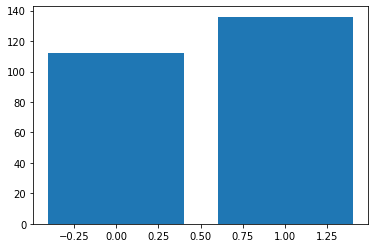

In [12]:
plt.bar(y.value_counts().index, y.value_counts())
plt.show()

In [13]:
# # 特征缩放，归一化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
#RF
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=10, n_estimators=100)

In [15]:
#K折交叉验证简单例子  RF
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
#model = classifier#建立一个模型
kf=KFold(n_splits=5,shuffle=True)#建立k折
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state =100)#建立rkf
print(cross_val_score(model_RF, X, y, scoring='accuracy', cv=kf))#将k折应用到模型，并返回结果。
#cross_val_score是一个计算得分的函数

[0.56       0.68       0.64       0.7755102  0.65306122]


In [16]:
def false_positive_rate(y_true, y_pred):

    # false positive
    fp = ((y_pred == 1) & (y_true == 0)).sum()

    # true negative
    tn = ((y_pred == 0) & (y_true == 0)).sum()

    # false positive rate
    return fp / (fp + tn)

In [17]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

In [18]:
#交叉验证 SVM
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate #评价多个指标
from sklearn.pipeline import Pipeline#标准化集成
scoring = {'acc': 'accuracy',
           'precison': 'precision_macro',
           'recall': 'recall_macro',
           'F1-scores': 'f1_macro',
           'false_positive_rate': make_scorer(false_positive_rate),
           'AUC': 'roc_auc'}

pipeline = Pipeline([('transformer', sc), ('estimator', model_LR)])#标准化

scores = cross_validate(pipeline, X, y, scoring=scoring,
                         cv=rkf, return_train_score=True)

print(scores.keys())
print("accuracy:",scores['test_acc'].mean())  
print("precison:",scores['test_precison'].mean())
print("recall:",scores['test_recall'].mean())
print("F1-scores:",scores['test_F1-scores'].mean())
print("test_false_positive_rate:",scores['test_false_positive_rate'].mean()) 
print("AUC:",scores['test_AUC'].mean())

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_precison', 'train_precison', 'test_recall', 'train_recall', 'test_F1-scores', 'train_F1-scores', 'test_false_positive_rate', 'train_false_positive_rate', 'test_AUC', 'train_AUC'])
accuracy: 0.7285632653061225
precison: 0.7288429960360904
recall: 0.7234353800727176
F1-scores: 0.7208008850484389
test_false_positive_rate: 0.32802848075519697
AUC: 0.7768204377545233
